In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('dataset.csv')

In [5]:
print("=" * 80)
print("INFORMASI DASAR DATASET")
print("=" * 80)

print(f"\nDimensi Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")

print("\n--- Info Dataset ---")
print(df.info())

print("\n--- 5 Data Pertama ---")
print(df.head())

print("\n--- 5 Data Terakhir ---")
print(df.tail())

INFORMASI DASAR DATASET

Dimensi Dataset: 9179 baris x 28 kolom

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Database Fundamentals            9179 non-null   int64  
 1   Computer Architecture            9179 non-null   int64  
 2   Distributed Computing Systems    9179 non-null   int64  
 3   Cyber Security                   9179 non-null   int64  
 4   Networking                       9179 non-null   int64  
 5   Software Development             9179 non-null   int64  
 6   Programming Skills               9179 non-null   int64  
 7   Project Management               9179 non-null   int64  
 8   Computer Forensics Fundamentals  9179 non-null   int64  
 9   Technical Communication          9179 non-null   int64  
 10  AI ML                            9179 non-null   int64  
 

In [6]:
print("\n" + "=" * 80)
print("STATISTIK DESKRIPTIF")
print("=" * 80)

print("\n--- Statistik Deskriptif (Kolom Numerik) ---")
print(df.describe())

print("\n--- Statistik Deskriptif (Kolom Kategorikal) ---")
print(df.describe(include=['object']))



STATISTIK DESKRIPTIF

--- Statistik Deskriptif (Kolom Numerik) ---
       Database Fundamentals  Computer Architecture  \
count            9179.000000            9179.000000   
mean                2.705959               2.705959   
std                 1.850403               1.850403   
min                 0.000000               0.000000   
25%                 1.000000               1.000000   
50%                 3.000000               3.000000   
75%                 4.000000               4.000000   
max                 6.000000               6.000000   

       Distributed Computing Systems  Cyber Security   Networking  \
count                    9179.000000     9179.000000  9179.000000   
mean                        2.705959        2.705959     2.705959   
std                         1.850403        1.850403     1.850403   
min                         0.000000        0.000000     0.000000   
25%                         1.000000        1.000000     1.000000   
50%                   

In [7]:
print("\n" + "=" * 80)
print("ANALISIS MISSING VALUES")
print("=" * 80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if len(missing_df) > 0:
    print("\n--- Missing Values ---")
    print(missing_df)
else:
    print("\nTidak ada missing values dalam dataset!")



ANALISIS MISSING VALUES

Tidak ada missing values dalam dataset!



DISTRIBUSI TARGET VARIABLE (ROLE)

--- Jumlah per Role ---
Role
AI ML Specialist                   1080
Database Administrator              540
Application Support Engineer        540
Hardware Engineer                   540
Networking Engineer                 540
Software Developer                  540
API Specialist                      540
Cyber Security Specialist           540
Project Manager                     540
Information Security Specialist     540
Technical Writer                    540
Software tester                     540
Business Analyst                    540
Customer Service Executive          540
Helpdesk Engineer                   540
Graphics Designer                   539
Name: count, dtype: int64

--- Persentase per Role ---
Role
AI ML Specialist                   11.765988
Database Administrator              5.882994
Application Support Engineer        5.882994
Hardware Engineer                   5.882994
Networking Engineer                 5.882994
Software D

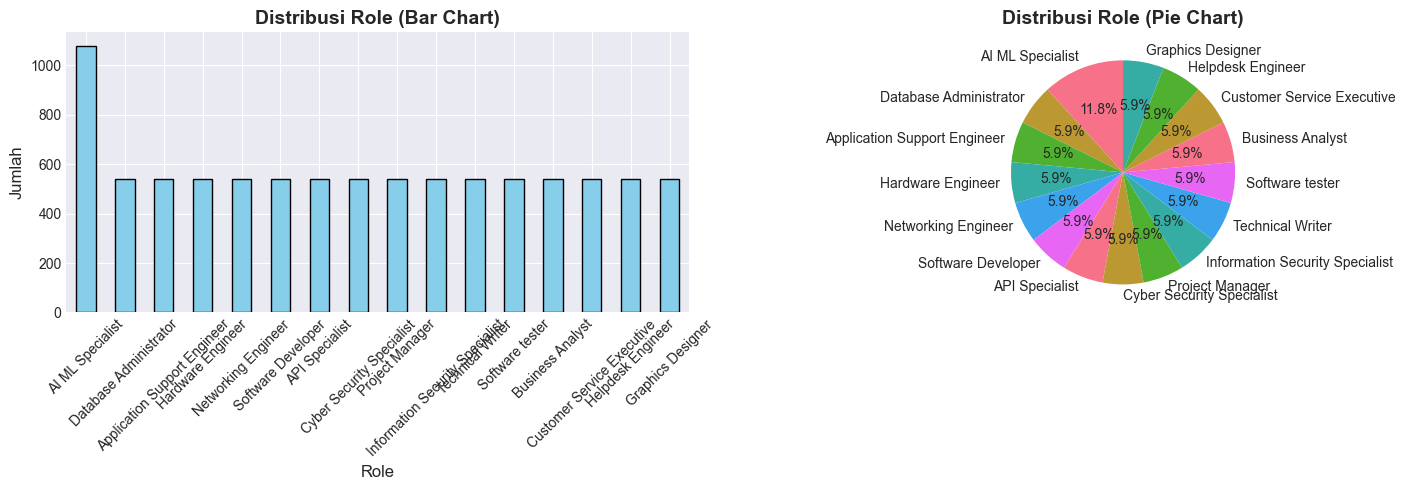

In [8]:
print("\n" + "=" * 80)
print("DISTRIBUSI TARGET VARIABLE (ROLE)")
print("=" * 80)

role_counts = df['Role'].value_counts()
print("\n--- Jumlah per Role ---")
print(role_counts)
print(f"\n--- Persentase per Role ---")
print(df['Role'].value_counts(normalize=True) * 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

role_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Role (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Role', fontsize=12)
axes[0].set_ylabel('Jumlah', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

axes[1].pie(role_counts.values, labels=role_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribusi Role (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



DISTRIBUSI FITUR SKILLS

--- Statistik Skills ---
       Database Fundamentals  Computer Architecture  \
count            9179.000000            9179.000000   
mean                2.705959               2.705959   
std                 1.850403               1.850403   
min                 0.000000               0.000000   
25%                 1.000000               1.000000   
50%                 3.000000               3.000000   
75%                 4.000000               4.000000   
max                 6.000000               6.000000   

       Distributed Computing Systems  Cyber Security   Networking  \
count                    9179.000000     9179.000000  9179.000000   
mean                        2.705959        2.705959     2.705959   
std                         1.850403        1.850403     1.850403   
min                         0.000000        0.000000     0.000000   
25%                         1.000000        1.000000     1.000000   
50%                         3.000000   

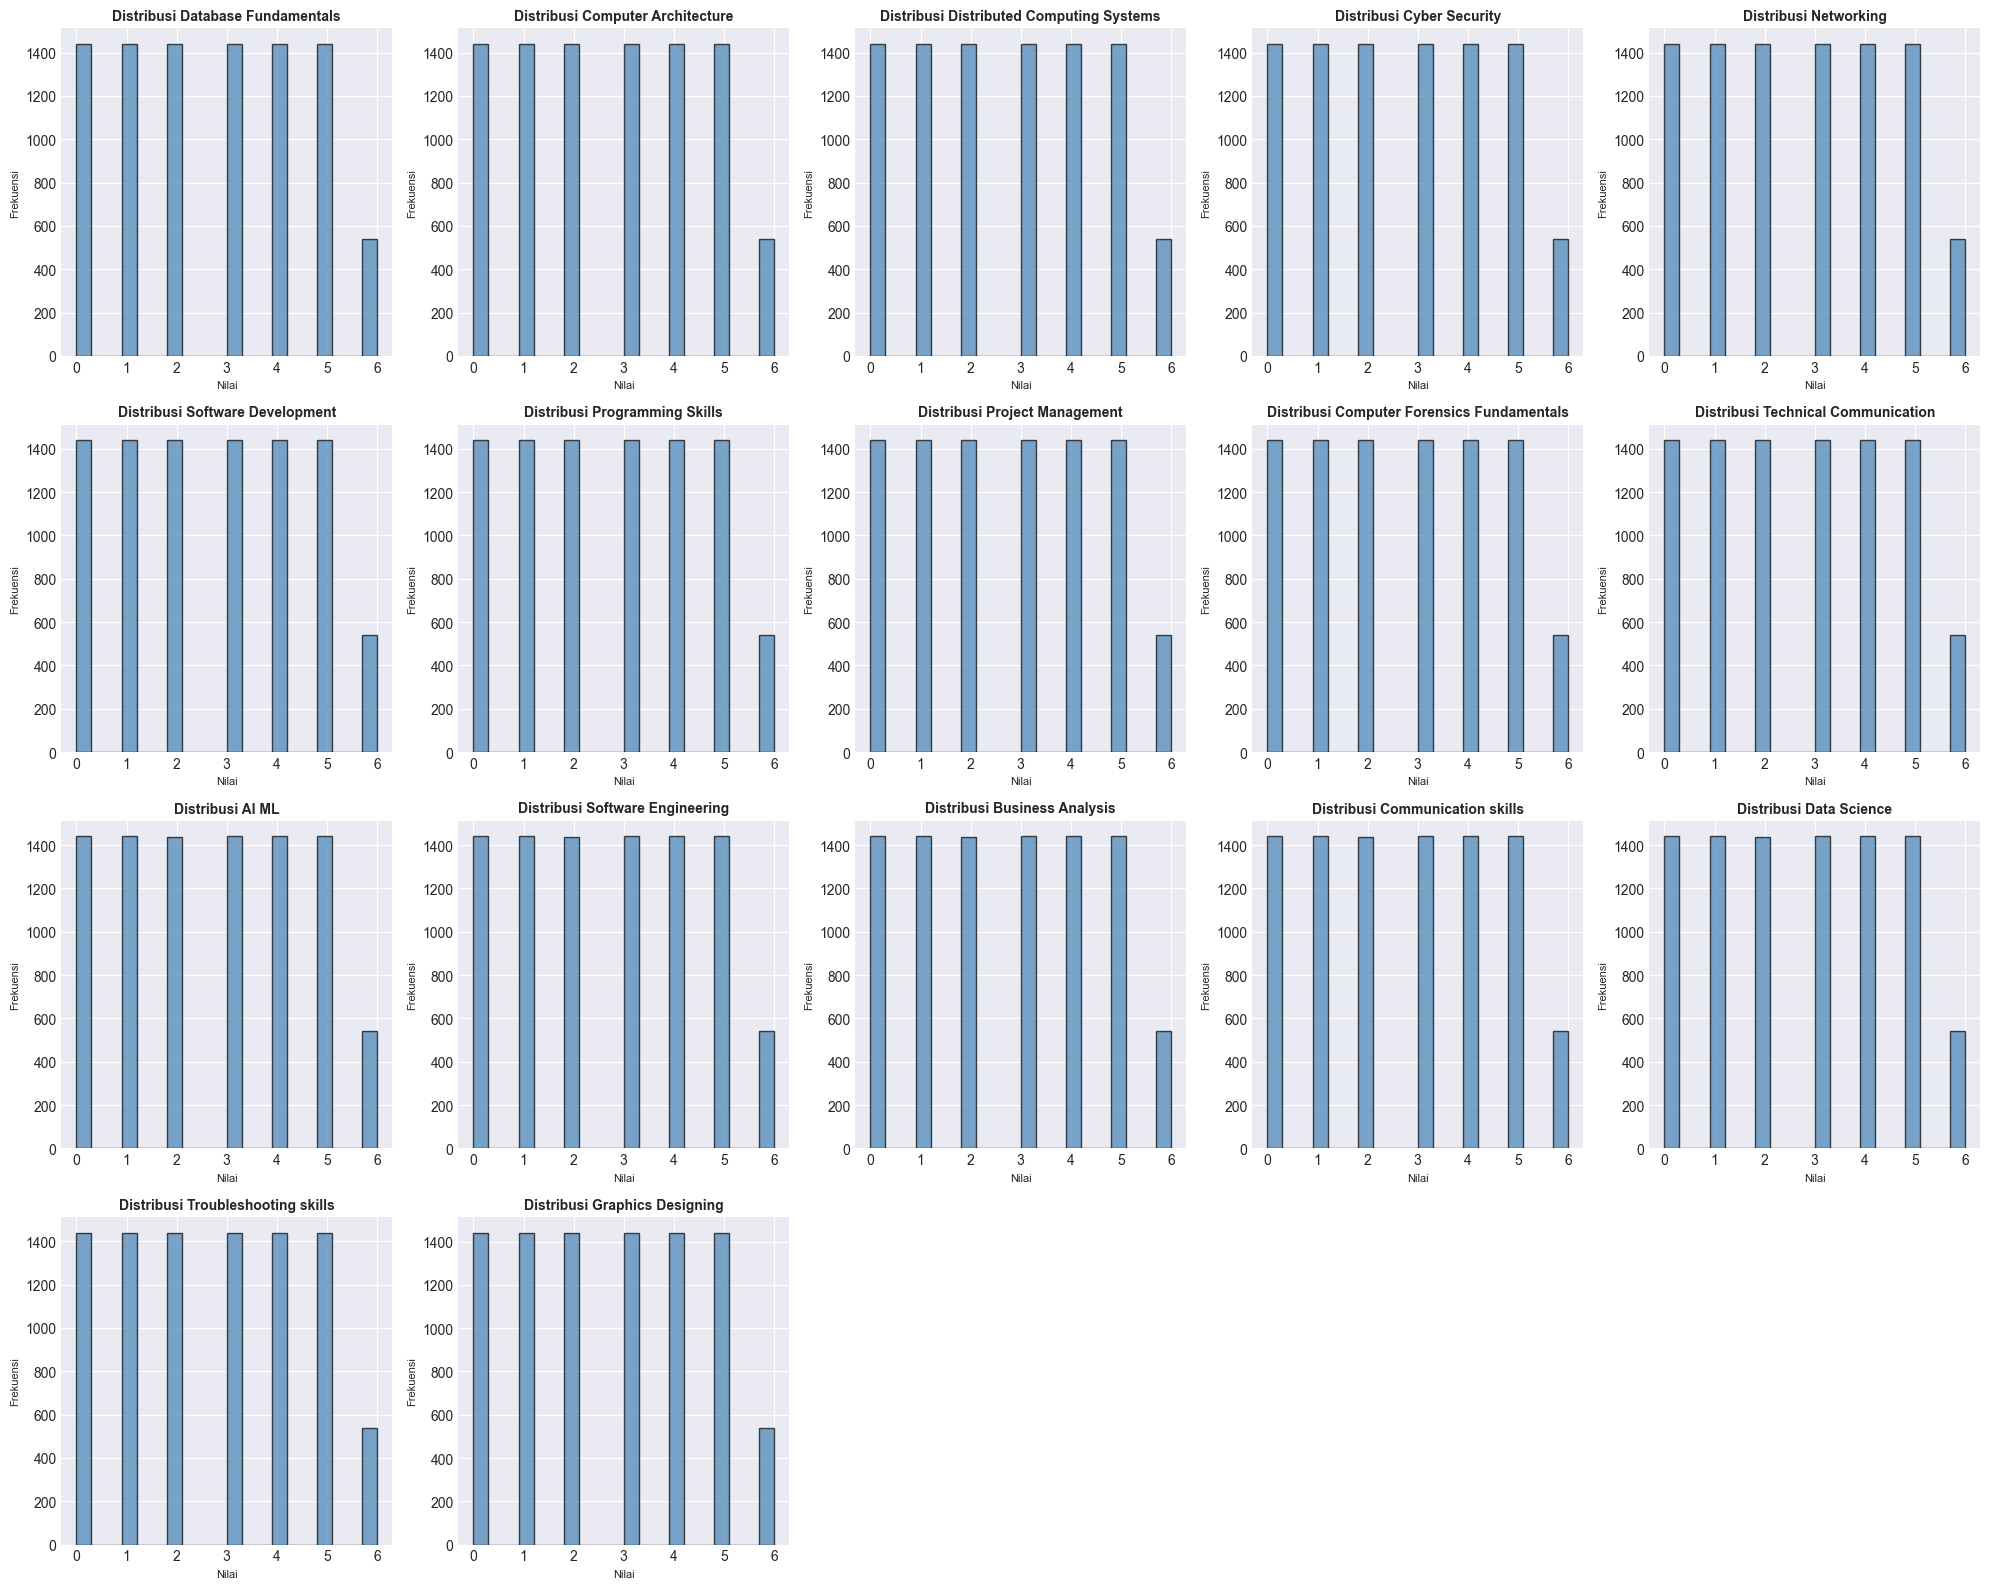

In [9]:
print("\n" + "=" * 80)
print("DISTRIBUSI FITUR SKILLS")
print("=" * 80)

skill_columns = df.columns[:17] 

print("\n--- Statistik Skills ---")
print(df[skill_columns].describe())

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(skill_columns):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Nilai', fontsize=8)
        axes[idx].set_ylabel('Frekuensi', fontsize=8)

for idx in range(len(skill_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


DISTRIBUSI FITUR PERSONALITY

--- Statistik Personality ---
          Openness  Conscientousness  Extraversion  Agreeableness  \
count  9179.000000       9179.000000   9179.000000    9179.000000   
mean      0.734488          0.438438      0.400094       0.150369   
std       0.078523          0.122408      0.142363       0.096312   
min       0.563646          0.108561      0.102254       0.017733   
25%       0.685635          0.337844      0.283624       0.073822   
50%       0.727765          0.448789      0.378902       0.116550   
75%       0.785837          0.522801      0.525272       0.195782   
max       0.900797          0.734466      0.745477       0.538450   

       Emotional_Range  Conversation  Openness to Change     Hedonism  \
count      9179.000000   9179.000000         9179.000000  9179.000000   
mean          0.616173      0.104990            0.383124     0.164839   
std           0.097118      0.063861            0.069740     0.057645   
min           0.391125   

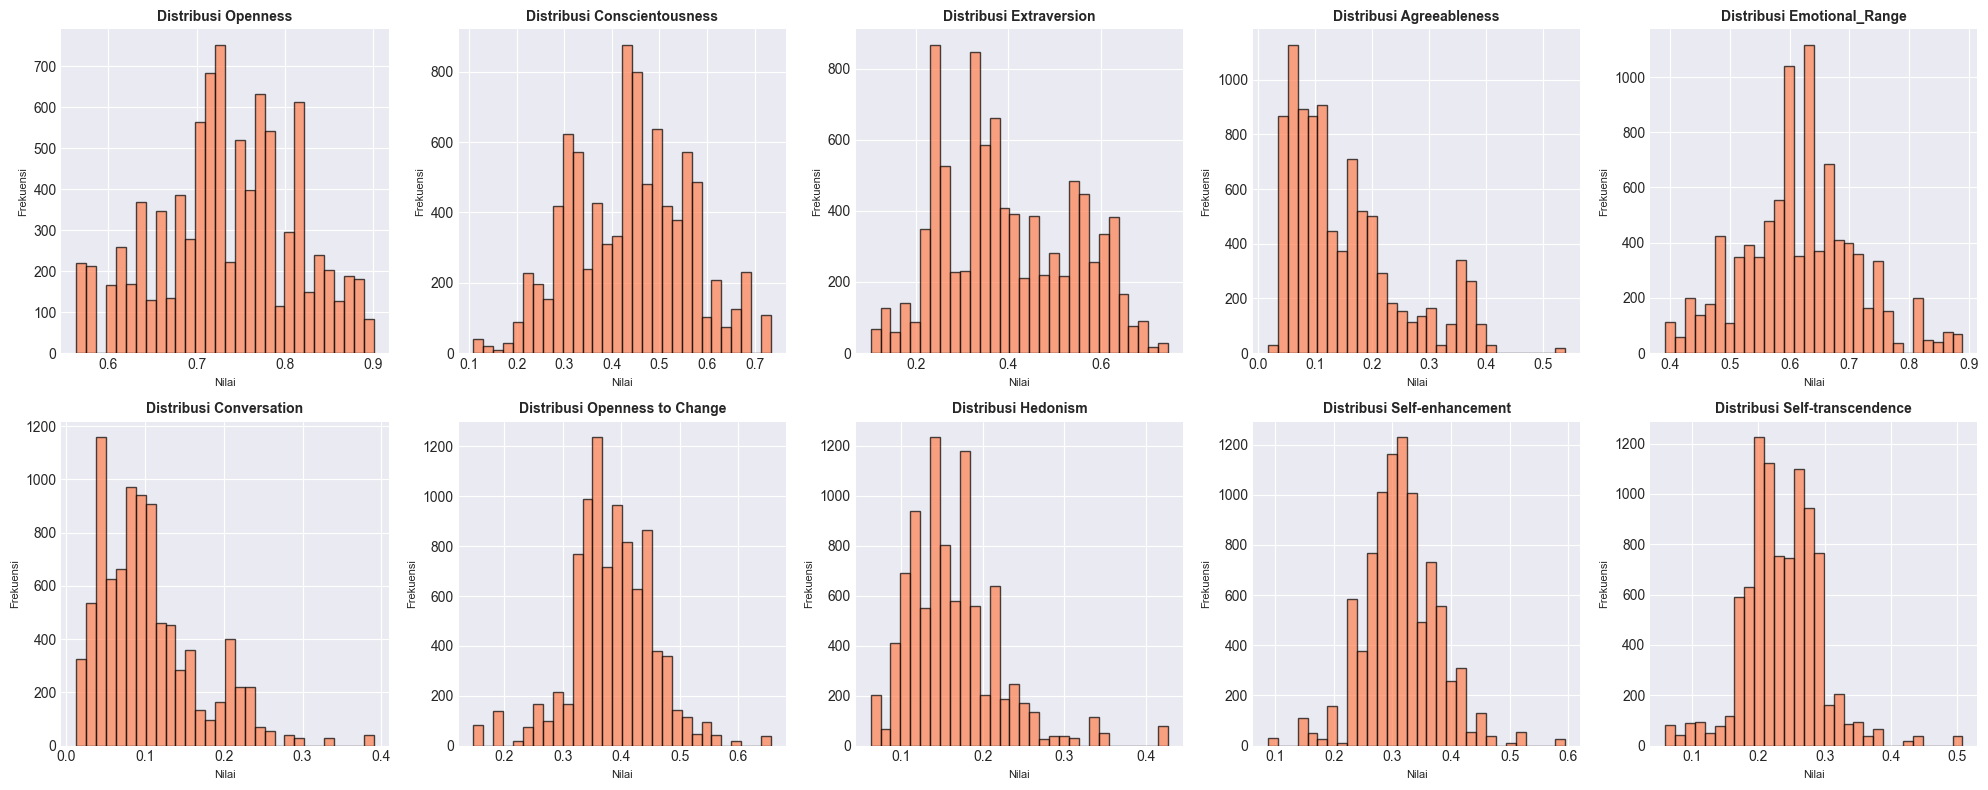

In [10]:
print("\n" + "=" * 80)
print("DISTRIBUSI FITUR PERSONALITY")
print("=" * 80)

personality_columns = df.columns[17:27]

print("\n--- Statistik Personality ---")
print(df[personality_columns].describe())

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, col in enumerate(personality_columns):
    axes[idx].hist(df[col], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Nilai', fontsize=8)
    axes[idx].set_ylabel('Frekuensi', fontsize=8)

plt.tight_layout()
plt.show()


ANALISIS KORELASI


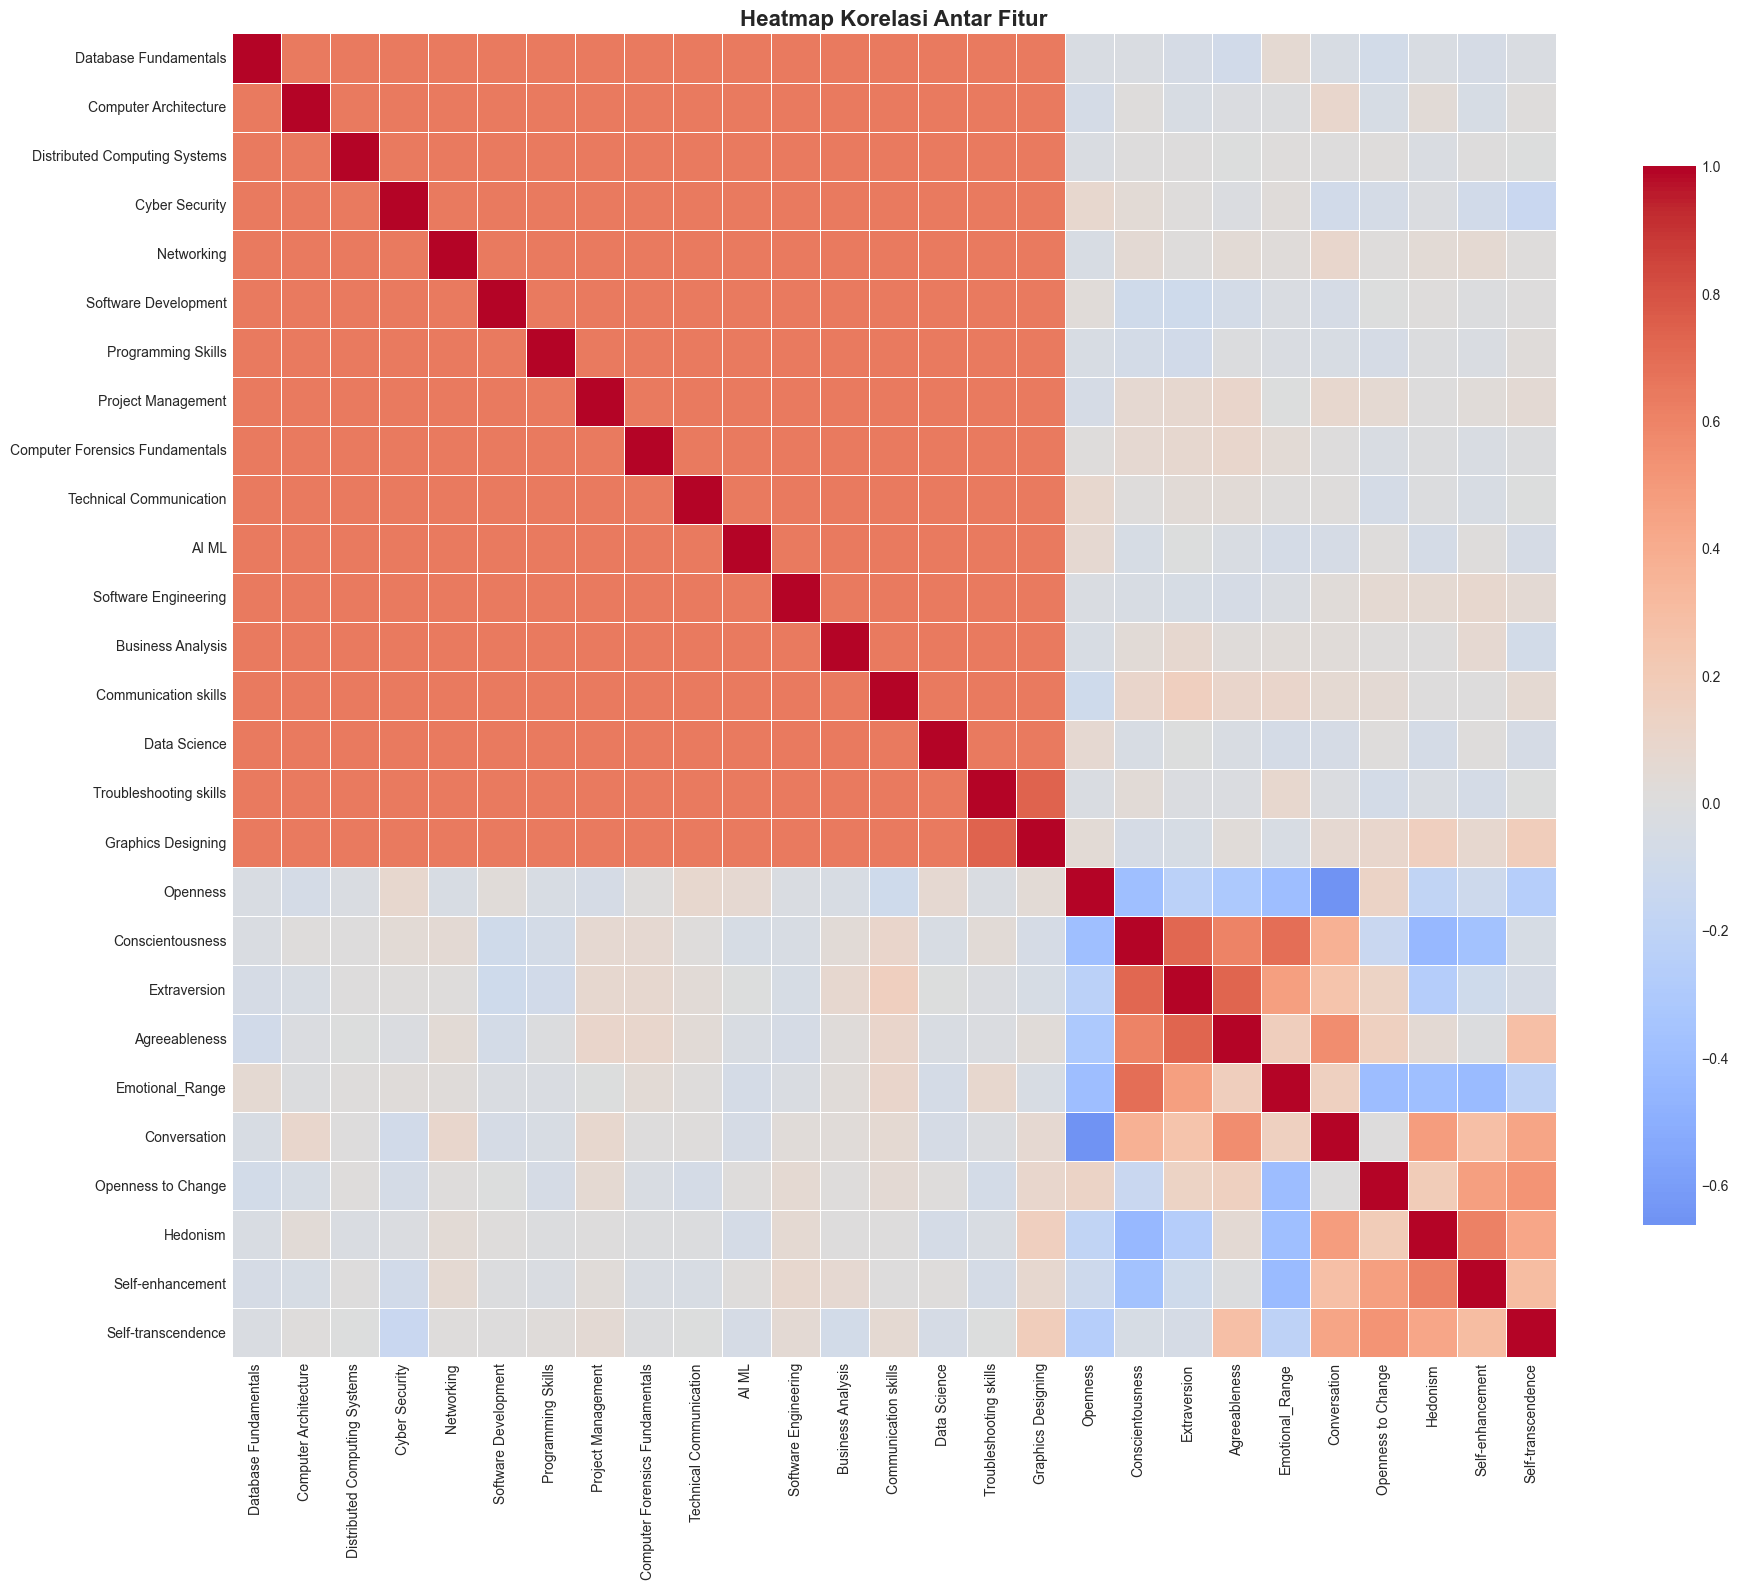


--- Top 10 Korelasi Tertinggi ---
Graphics Designing      Troubleshooting skills    0.739853
Troubleshooting skills  Graphics Designing        0.739853
Extraversion            Agreeableness             0.732577
Agreeableness           Extraversion              0.732577
Conscientousness        Extraversion              0.722297
Extraversion            Conscientousness          0.722297
Emotional_Range         Conscientousness          0.691255
Conscientousness        Emotional_Range           0.691255
Openness                Conversation              0.663908
Conversation            Openness                  0.663908
dtype: float64


In [ ]:
print("\n" + "=" * 80)
print("ANALISIS KORELASI")
print("=" * 80)

correlation_matrix = df[df.columns[:-1]].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n--- Top 10 Korelasi Tertinggi ---")
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove diagonal
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(10)
print(top_correlations)


DETEKSI OUTLIERS


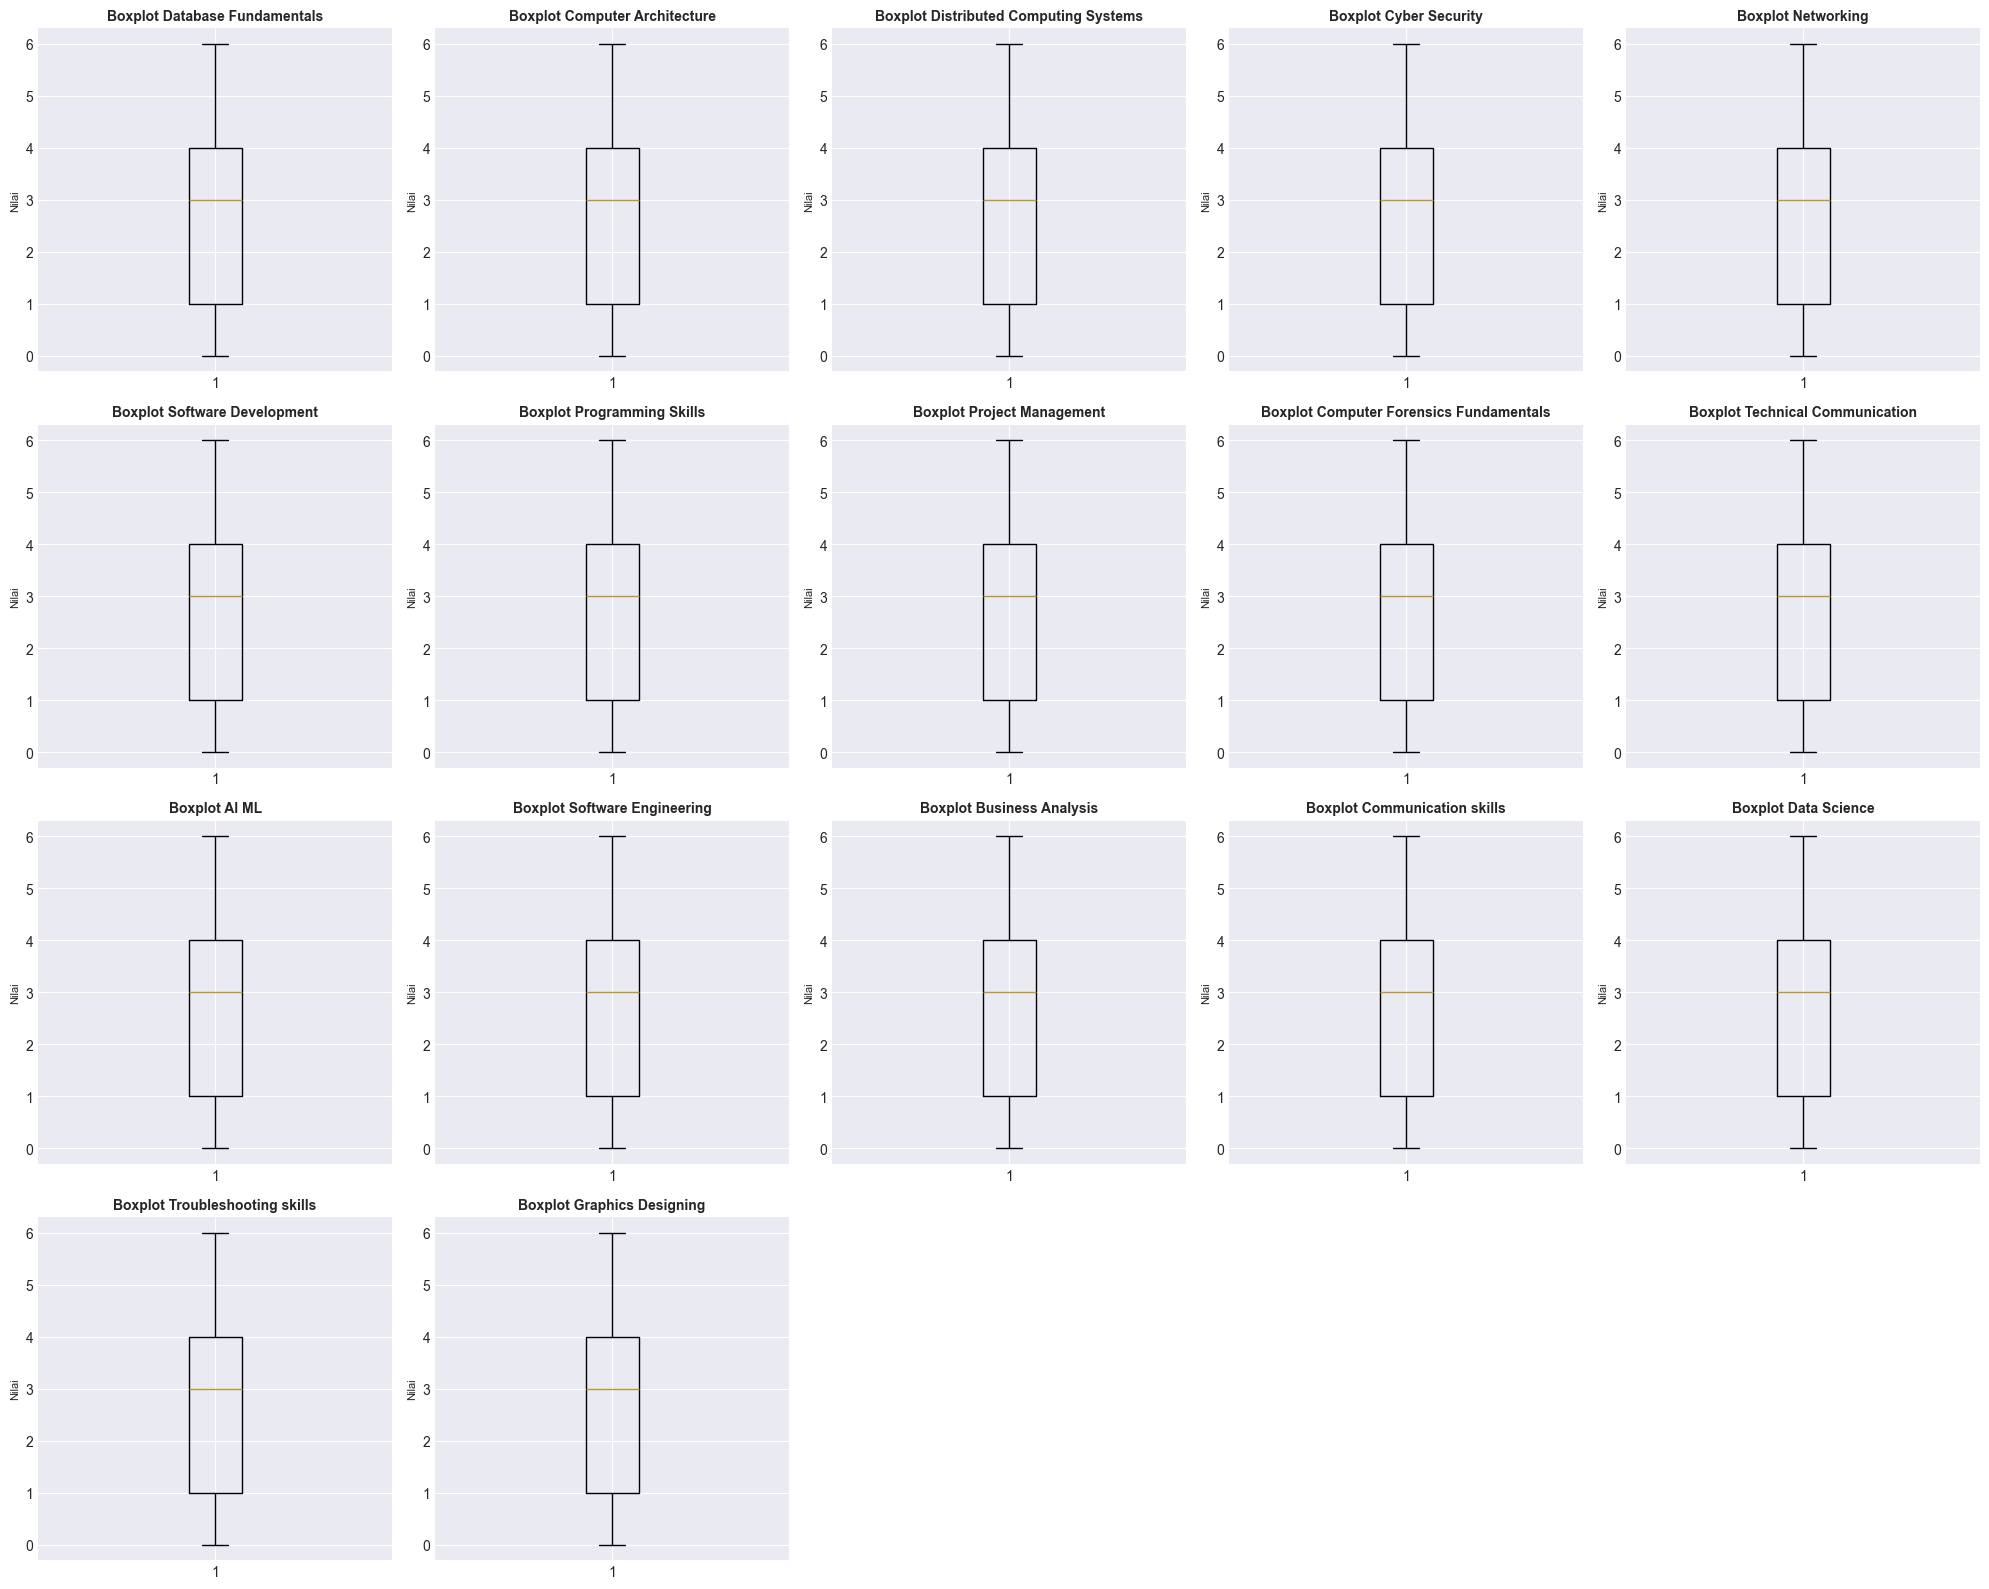

In [ ]:
print("\n" + "=" * 80)
print("DETEKSI OUTLIERS")
print("=" * 80)

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(skill_columns):
    if idx < len(axes):
        axes[idx].boxplot(df[col])
        axes[idx].set_title(f'Boxplot {col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Nilai', fontsize=8)

for idx in range(len(skill_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


PERBANDINGAN SKILLS BERDASARKAN ROLE

--- Rata-rata Skills per Role ---
                                 Database Fundamentals  Computer Architecture  \
Role                                                                            
AI ML Specialist                              2.500000               2.500000   
API Specialist                                2.500000               2.500000   
Application Support Engineer                  2.500000               2.500000   
Business Analyst                              2.500000               2.500000   
Customer Service Executive                    2.500000               2.500000   
Cyber Security Specialist                     2.500000               2.500000   
Database Administrator                        6.000000               2.500000   
Graphics Designer                             2.500928               2.500928   
Hardware Engineer                             2.500000               6.000000   
Helpdesk Engineer                   

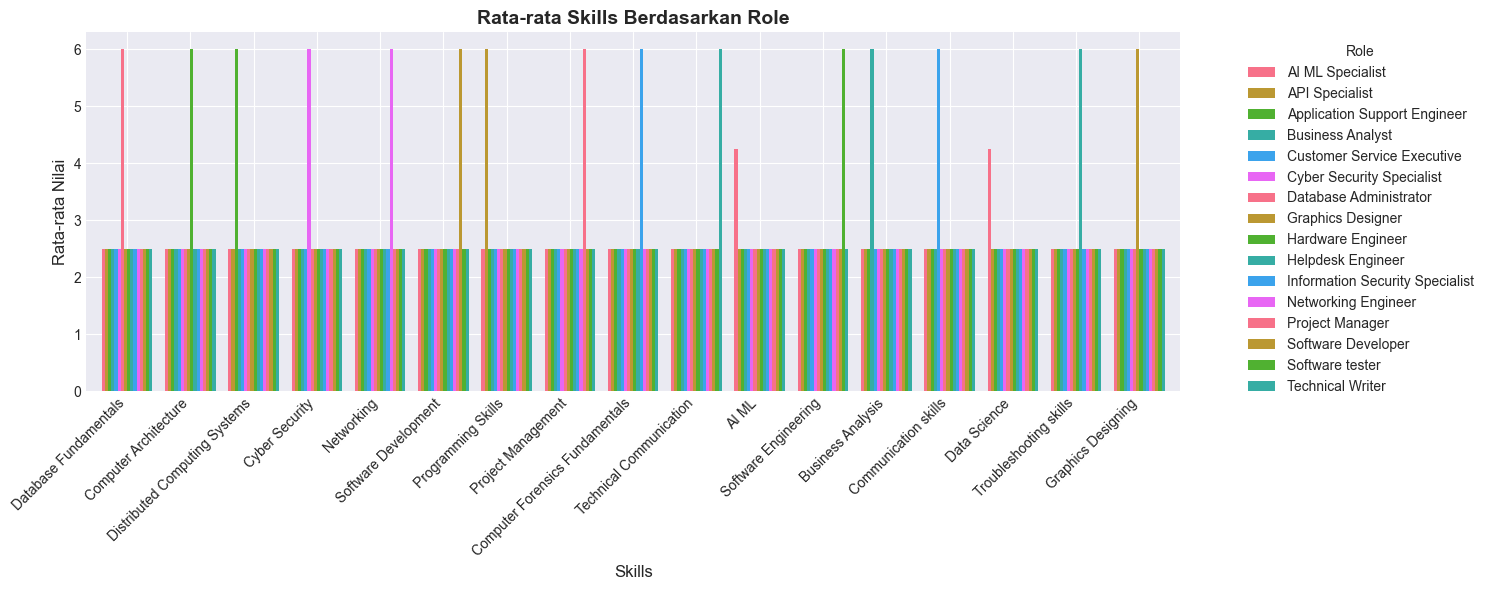

In [ ]:
print("\n" + "=" * 80)
print("PERBANDINGAN SKILLS BERDASARKAN ROLE")
print("=" * 80)

skills_by_role = df.groupby('Role')[skill_columns].mean()
print("\n--- Rata-rata Skills per Role ---")
print(skills_by_role)

skills_by_role.T.plot(kind='bar', figsize=(15, 6), width=0.8)
plt.title('Rata-rata Skills Berdasarkan Role', fontsize=14, fontweight='bold')
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Rata-rata Nilai', fontsize=12)
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


PERBANDINGAN PERSONALITY BERDASARKAN ROLE

--- Rata-rata Personality per Role ---
                                 Openness  Conscientousness  Extraversion  \
Role                                                                        
AI ML Specialist                 0.787056          0.385175      0.391667   
API Specialist                   0.706353          0.354219      0.284088   
Application Support Engineer     0.722963          0.443234      0.406771   
Business Analyst                 0.710085          0.470533      0.490006   
Customer Service Executive       0.664343          0.546544      0.598981   
Cyber Security Specialist        0.794642          0.477636      0.412953   
Database Administrator           0.709559          0.411058      0.329785   
Graphics Designer                0.768772          0.377047      0.333702   
Hardware Engineer                0.693437          0.441736      0.338855   
Helpdesk Engineer                0.721413          0.474222      0.376

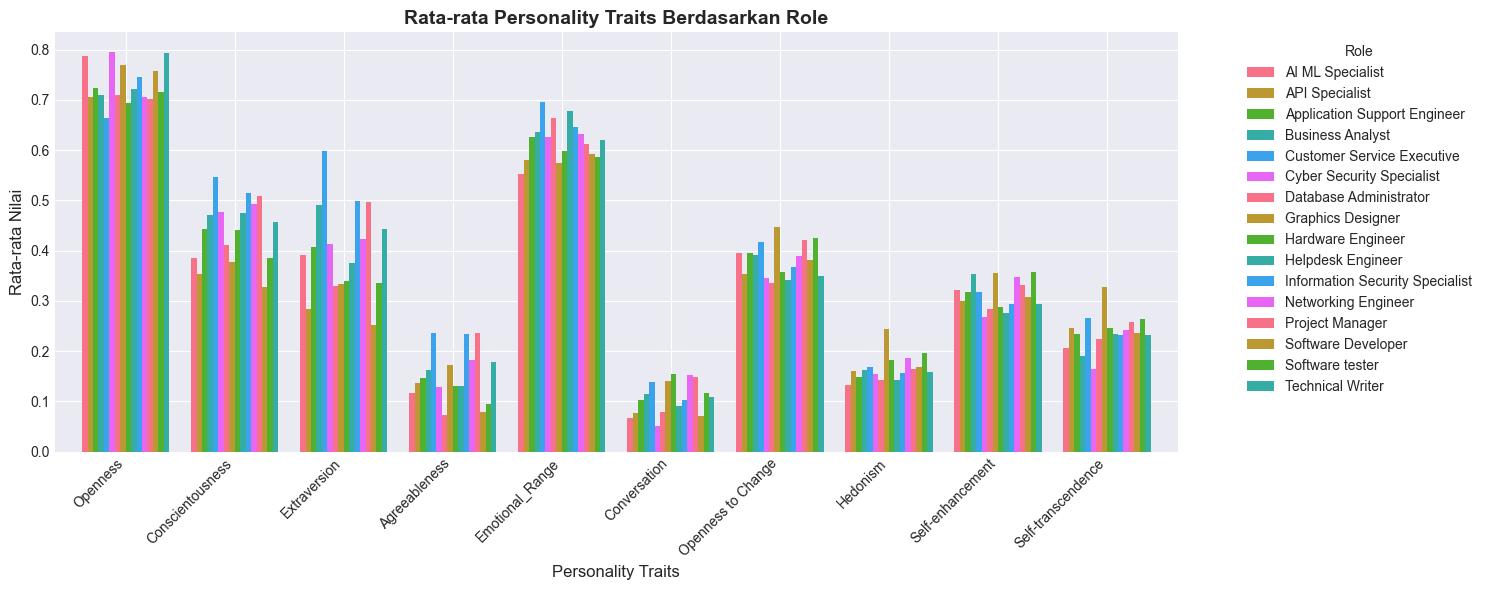

In [14]:
print("\n" + "=" * 80)
print("PERBANDINGAN PERSONALITY BERDASARKAN ROLE")
print("=" * 80)

personality_by_role = df.groupby('Role')[personality_columns].mean()
print("\n--- Rata-rata Personality per Role ---")
print(personality_by_role)

personality_by_role.T.plot(kind='bar', figsize=(15, 6), width=0.8)
plt.title('Rata-rata Personality Traits Berdasarkan Role', fontsize=14, fontweight='bold')
plt.xlabel('Personality Traits', fontsize=12)
plt.ylabel('Rata-rata Nilai', fontsize=12)
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
print("\n" + "=" * 80)
print("SUMMARY EDA")
print("=" * 80)

print(f"\n1. Total Data: {len(df)} baris")
print(f"2. Total Fitur: {len(df.columns)} kolom")
print(f"3. Jumlah Role: {df['Role'].nunique()} role unik")
print(f"4. Missing Values: {'Ada' if missing_values.sum() > 0 else 'Tidak ada'}")
print(f"5. Fitur Skills: {len(skill_columns)} fitur")
print(f"6. Fitur Personality: {len(personality_columns)} fitur")
print("\nEDA selesai!")


SUMMARY EDA

1. Total Data: 9179 baris
2. Total Fitur: 28 kolom
3. Jumlah Role: 16 role unik
4. Missing Values: Tidak ada
5. Fitur Skills: 17 fitur
6. Fitur Personality: 10 fitur

EDA selesai!
